In [39]:
from __future__ import (division, unicode_literals, absolute_import,
                        print_function)

from ema_workbench import (Model, RealParameter, Constant, CategoricalParameter, 
                           TimeSeriesOutcome, ScalarOutcome, ema_logging, perform_experiments, 
                           MultiprocessingEvaluator, Policy)
from ema_workbench.connectors.vensim import (VensimModel , VensimModelStructureInterface, set_value)
from ema_workbench.em_framework.samplers import sample_levers
from ema_workbench.util.utilities import save_results
from ema_workbench import load_results
from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter)
from ema_workbench.analysis import clusterer, plotting, Density, prim
from ema_workbench.analysis.plotting import lines, envelopes, kde_over_time, multiple_densities


import matplotlib.ticker as mtick
import timeit
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import itertools

from ema_workbench.analysis.plotting import lines

In [2]:
#Load dataframes
df_outcome = pd.read_excel(r'C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\policy_dataframe.xlsx',sheet_name='Sheet1', index_col=0)
df_depth = pd.read_excel(r'C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\policy_depths2_basedonfwb.xlsx',sheet_name='Sheet1', index_col=0)
maxdepth = pd.read_excel(r"C:\Users\douwe\OneDrive\Documenten\1.0 School\8.0 Thesis\5.0 Execution\Maasmodel\Results\policy_depths2_max.xlsx",sheet_name='Sheet1', index_col=0)

In [3]:
df_depth.drop(columns=df_depth.columns[0],
             axis=1, inplace=True)

# Violin Plot

Fresh water buffer

Text(0,0.5,'Percentage compared to full fresh water buffer [%]')

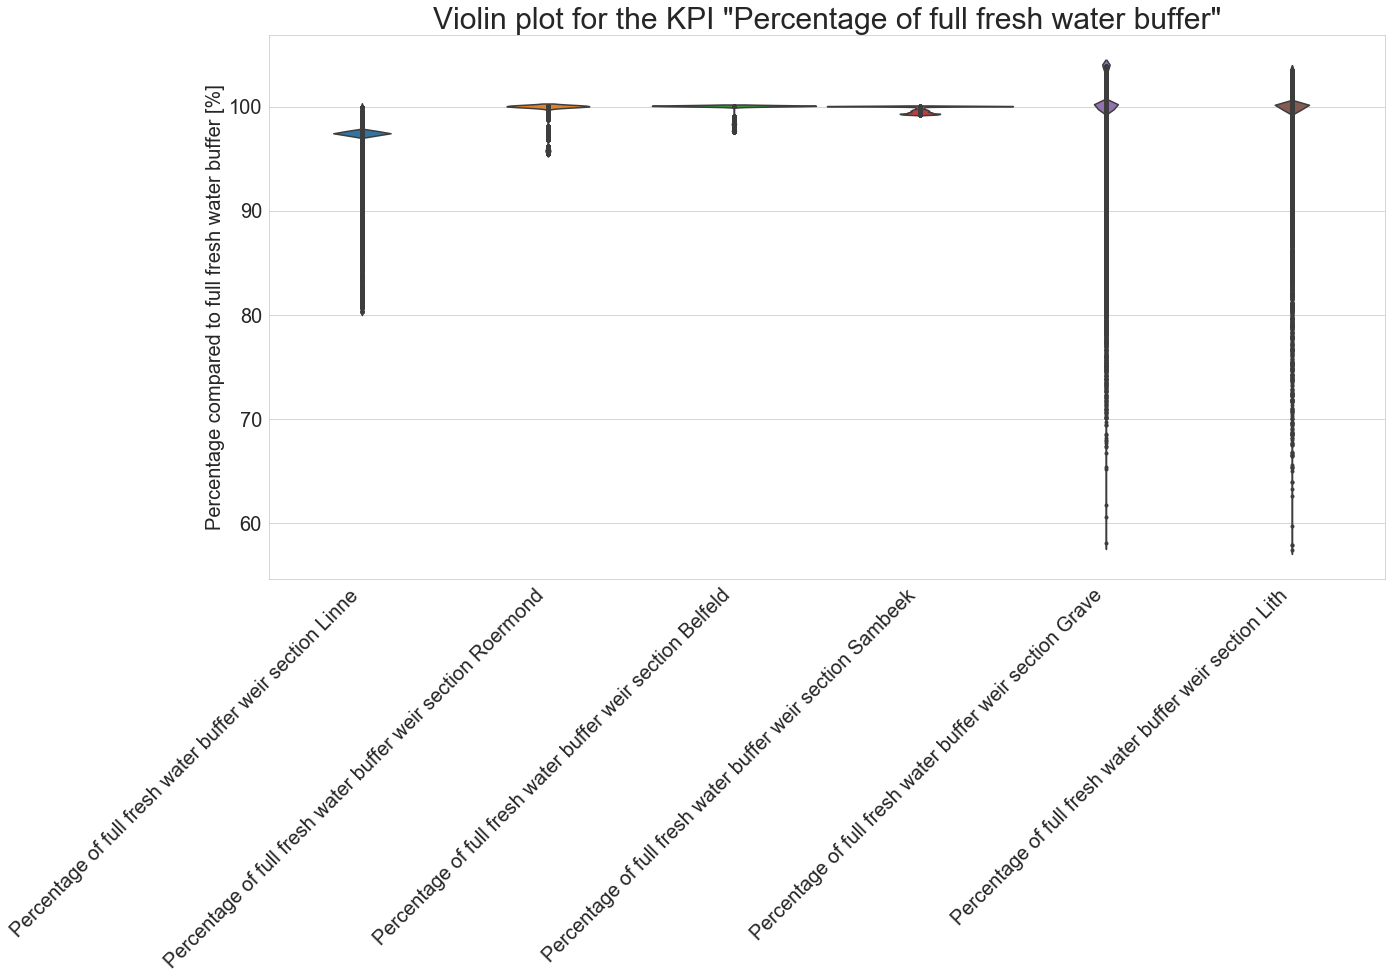

In [31]:
data = df_outcome.iloc[:,0:6]
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

ax = sns.violinplot(data=data, width=1 , inner="point" ) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right',
                   fontweight='light', fontsize=20)


plt.yticks(fontsize=20)    

plt.title('Violin plot for the KPI "Percentage of full fresh water buffer"', fontsize=30)
plt.ylabel("Percentage compared to full fresh water buffer [%]", fontsize=20) 

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Percentage compared to full fresh water buffer [%]')

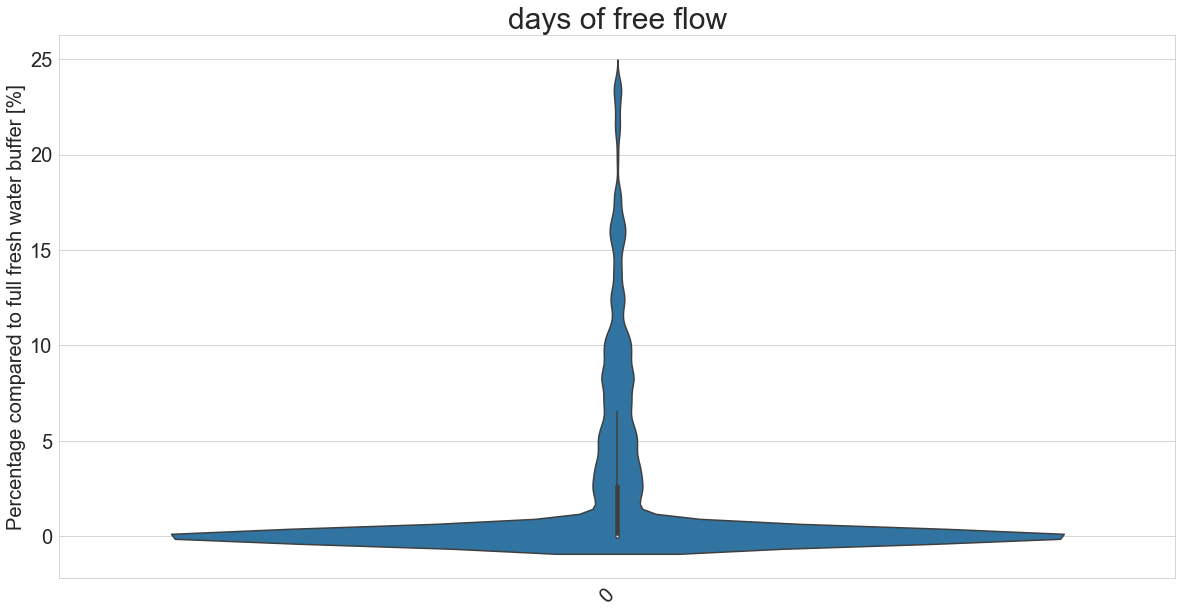

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=df_outcome.iloc[:,6])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right',
                   fontweight='light', fontsize=20)

plt.yticks(fontsize=20)    

plt.title('days of free flow', fontsize=30)
plt.ylabel("Percentage compared to full fresh water buffer [%]", fontsize=20) 

Text(0,0.5,'Percentage compared to full fresh water buffer [%]')

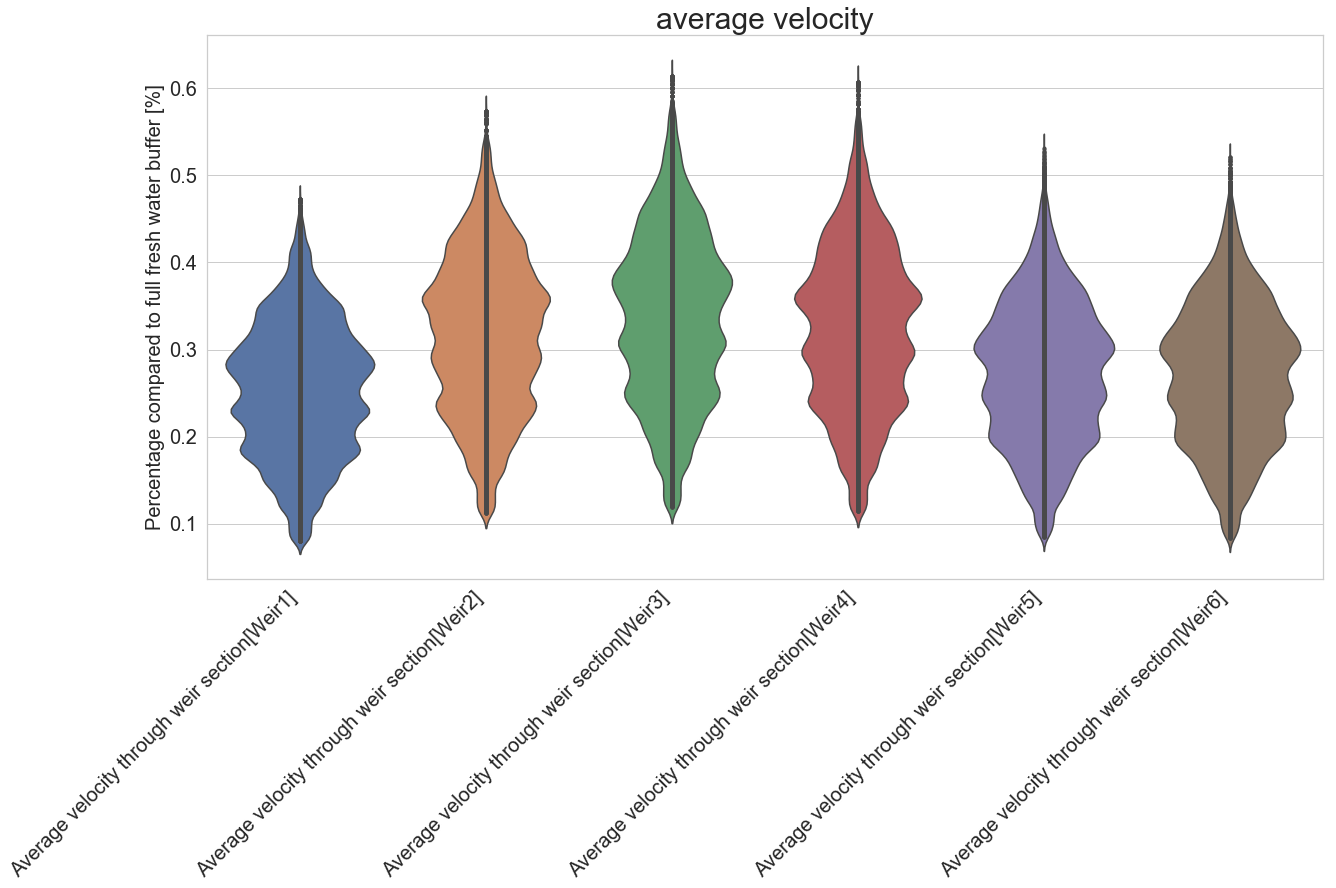

In [72]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=df_outcome.iloc[:,7:13], inner='point')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right',
                   fontweight='light', fontsize=20)

plt.yticks(fontsize=20)    

plt.title('average velocity', fontsize=30)
plt.ylabel("Percentage compared to full fresh water buffer [%]", fontsize=20) 

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Percentage compared to full fresh water buffer [%]')

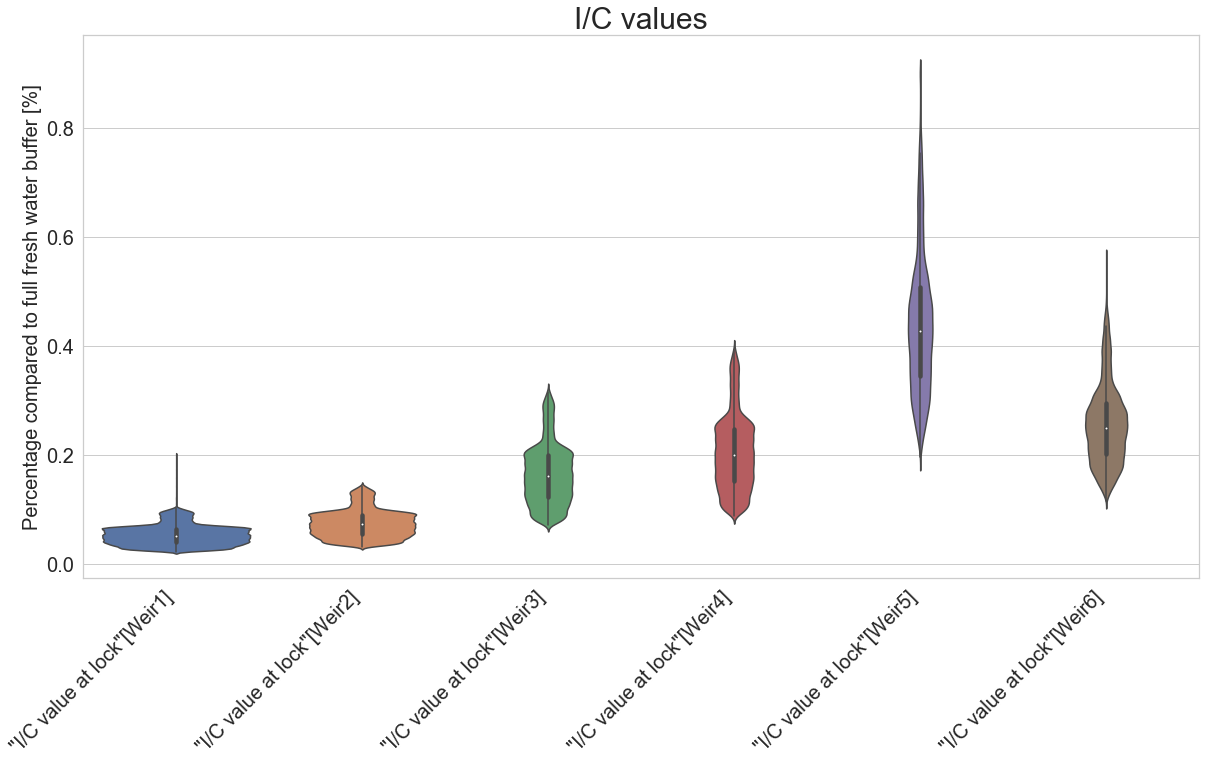

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=df_outcome.iloc[:,13:19])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right',
                   fontweight='light', fontsize=20)

plt.yticks(fontsize=20)    

plt.title('I/C values', fontsize=30)
plt.ylabel("Percentage compared to full fresh water buffer [%]", fontsize=20) 

# Lineplot

In [100]:
test = df_depth[df_depth.columns[0:190]]
unsure = df_depth[df_depth.columns[190:]]
test1 = maxdepth[maxdepth.columns[0:190]]
unsure1 = maxdepth[maxdepth.columns[190:]]

In [101]:
x1=[]
x=[]


for j in range((57)):
    x1.append(round(-0.4526*j+36.136,2))


for i in range((190-57)):
    x.append(round(-0.1086*i+10,2))
    
bottom = x1+x

In [102]:
data=(test[test.columns[0]] + bottom[0]).to_frame()
for i in range(190):
    probeer = (test[test.columns[i]] + bottom[i]).to_frame()
    data=pd.concat([data,probeer], axis=1)
    
    
data1=(test1[test1.columns[0]] + bottom[0]).to_frame()
for i in range(190):
    probeer1 = (test1[test1.columns[i]] + bottom[i]).to_frame()
    data1=pd.concat([data1,probeer1], axis=1)
    
    
NAPmin = pd.concat([data,unsure], axis=1)
NAPmin = NAPmin.iloc[:,1:]
NAPmax = pd.concat([data1,unsure1], axis=1)
NAPmax = NAPmax.iloc[:,1:]

In [109]:
first=136
last=190

a = NAPmin[NAPmin.columns[first:last]]#df_depth[df_depth.columns[first:last]]
b = NAPmin[NAPmin.columns[190:]]#df_depth[df_depth.columns[190:]]
c = NAPmax[NAPmax.columns[first:last]]#maxdepth[maxdepth.columns[first:last]]
d = NAPmax[NAPmax.columns[190:]]#maxdepth[maxdepth.columns[190:]]
mindepths = pd.concat([a,b], axis=1)
maxdepths = pd.concat([c,d], axis=1)

In [110]:
uniek = mindepths['policy'].unique()
mindepth = mindepths.loc[mindepths['policy'].isin([uniek[0], uniek[1], uniek[2], uniek[3], uniek[4], uniek[7], uniek[8],
                                                   uniek[9], uniek[10]])] 

a = mindepth.iloc[:,0:last-first]

In [111]:
loc = c.keys()
percent=int(len(c)*0.1)

all_max = []
for i in range(len(loc)):
    all_max.append(np.round(np.mean(c.iloc[:,i].nlargest(800)),2))
    

all_min = []
for i in range(len(loc)):
    all_min.append(np.round(np.mean(a.iloc[:,i].nsmallest(2400)),2))

In [112]:
mindf_nopol = mindepths.loc[mindepths['policy'] == 'No policy']
mindf_nopol.reset_index(drop=True,  inplace=True)
mindata_nopol = mindf_nopol.iloc[:,0:(last-first)]

mindf_crest = mindepths.loc[mindepths['policy'] == 'Crest Grave raised']
mindf_crest.reset_index(drop=True,  inplace=True)
mindata_crest = mindf_crest.iloc[:,0:(last-first)]

mindf_dyn = mindepths.loc[mindepths['policy'] == 'Dynamic crest level']
mindf_dyn.reset_index(drop=True,  inplace=True)
mindata_dyn = mindf_dyn.iloc[:,0:(last-first)]

mindf_pump = mindepths.loc[mindepths['policy'] == 'Pumps on']
mindf_pump.reset_index(drop=True,  inplace=True)
mindata_pump = mindf_pump.iloc[:,0:(last-first)]

mindf_level = mindepths.loc[mindepths['policy'] == 'Levelling restrictions']
mindf_level.reset_index(drop=True,  inplace=True)
mindata_level = mindf_level.iloc[:,0:(last-first)]

mindf_reloc = mindepths.loc[mindepths['policy'] == 'Relocate weir']
mindf_reloc.reset_index(drop=True,  inplace=True)
mindata_reloc = mindf_reloc.iloc[:,0:(last-first)]

mindf_relcrest = mindepths.loc[mindepths['policy'] == 'Relocate weir and raise crest level Lith']
mindf_relcrest.reset_index(drop=True,  inplace=True)
mindata_relcrest = mindf_relcrest.iloc[:,0:(last-first)]

mindf_dynpump = mindepths.loc[mindepths['policy'] == 'Dynamic crest level and pumps on']
mindf_dynpump.reset_index(drop=True,  inplace=True)
mindata_dynpump = mindf_dynpump.iloc[:,0:(last-first)]



maxdf_nopol = maxdepths.loc[maxdepths['policy'] == 'No policy']
maxdf_nopol.reset_index(drop=True,  inplace=True)
maxdata_nopol = maxdf_nopol.iloc[:,0:(last-first)]

maxdf_crest = maxdepths.loc[maxdepths['policy'] == 'Crest Grave raised']
maxdf_crest.reset_index(drop=True,  inplace=True)
maxdata_crest = maxdf_crest.iloc[:,0:(last-first)]

maxdf_dyn = maxdepths.loc[maxdepths['policy'] == 'Dynamic crest level']
maxdf_dyn.reset_index(drop=True,  inplace=True)
maxdata_dyn = maxdf_dyn.iloc[:,0:(last-first)]

maxdf_pump = maxdepths.loc[maxdepths['policy'] == 'Pumps on']
maxdf_pump.reset_index(drop=True,  inplace=True)
maxdata_pump = maxdf_pump.iloc[:,0:(last-first)]

maxdf_level = maxdepths.loc[maxdepths['policy'] == 'Levelling restrictions']
maxdf_level.reset_index(drop=True,  inplace=True)
maxdata_level = maxdf_level.iloc[:,0:(last-first)]

maxdf_reloc = maxdepths.loc[maxdepths['policy'] == 'Relocate weir']
maxdf_reloc.reset_index(drop=True,  inplace=True)
maxdata_reloc = maxdf_reloc.iloc[:,0:(last-first)]

maxdf_relcrest = maxdepths.loc[maxdepths['policy'] == 'Relocate weir and raise crest level Lith']
maxdf_relcrest.reset_index(drop=True,  inplace=True)
maxdata_relcrest = maxdf_relcrest.iloc[:,0:(last-first)]

maxdf_dynpump = maxdepths.loc[maxdepths['policy'] == 'Dynamic crest level and pumps on']
maxdf_dynpump.reset_index(drop=True,  inplace=True)
maxdata_dynpump = maxdf_dynpump.iloc[:,0:(last-first)]

In [113]:
perc1=800
perc2=80

mindepth_nopol = []
for i in range(len(loc)):
    mindepth_nopol.append(np.round(np.mean(mindata_nopol.iloc[:,i].nsmallest(perc1)),2))
    
mindepth_crest = []
for i in range(len(loc)):
    mindepth_crest.append(np.round(np.mean(mindata_crest.iloc[:,i].nsmallest(perc1)),2))
    
mindepth_dyn = []
for i in range(len(loc)):
    mindepth_dyn.append(np.round(np.mean(mindata_dyn.iloc[:,i].nsmallest(perc1)),2))
    
mindepth_pump = []
for i in range(len(loc)):
    mindepth_pump.append(np.round(np.mean(mindata_pump.iloc[:,i].nsmallest(perc1)),2))
    
mindepth_level = []
for i in range(len(loc)):
    mindepth_level.append(np.round(np.mean(mindata_level.iloc[:,i].nsmallest(perc1)),2))
    
mindepth_reloc = []
for i in range(len(loc)):
    mindepth_reloc.append(np.round(np.mean(mindata_reloc.iloc[:,i].nsmallest(perc1)),2))
        
mindepth_relcrest = []
for i in range(len(loc)):
    mindepth_relcrest.append(np.round(np.mean(mindata_relcrest.iloc[:,i].nsmallest(perc1)),2))
    
mindepth_dynpump = []
for i in range(len(loc)):
    mindepth_dynpump.append(np.round(np.mean(mindata_dynpump.iloc[:,i].nsmallest(perc1)),2))
    
    
    
maxdepth_nopol = []
for i in range(len(loc)):
    maxdepth_nopol.append(np.round(np.mean(maxdata_nopol.iloc[:,i].nlargest(perc2)),2))
    
maxdepth_crest = []
for i in range(len(loc)):
    maxdepth_crest.append(np.round(np.mean(maxdata_crest.iloc[:,i].nlargest(perc2)),2))
    
maxdepth_dyn = []
for i in range(len(loc)):
    maxdepth_dyn.append(np.round(np.mean(maxdata_dyn.iloc[:,i].nlargest(perc2)),2))
    
maxdepth_pump = []
for i in range(len(loc)):
    maxdepth_pump.append(np.round(np.mean(maxdata_pump.iloc[:,i].nlargest(perc2)),2))
    
maxdepth_level = []
for i in range(len(loc)):
    maxdepth_level.append(np.round(np.mean(maxdata_level.iloc[:,i].nlargest(perc2)),2))
    
maxdepth_reloc = []
for i in range(len(loc)):
    maxdepth_reloc.append(np.round(np.mean(maxdata_reloc.iloc[:,i].nlargest(perc2)),2))
    
maxdepth_relcrest = []
for i in range(len(loc)):
    maxdepth_relcrest.append(np.round(np.mean(maxdata_relcrest.iloc[:,i].nlargest(perc2)),2))
    
maxdepth_dynpump = []
for i in range(len(loc)):
    maxdepth_dynpump.append(np.round(np.mean(maxdata_dynpump.iloc[:,i].nlargest(perc2)),2))

C:\Programs\Anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "
C:\Programs\Anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "
C:\Programs\Anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "
C:\Programs\Anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


Text(199,6,'Lith')

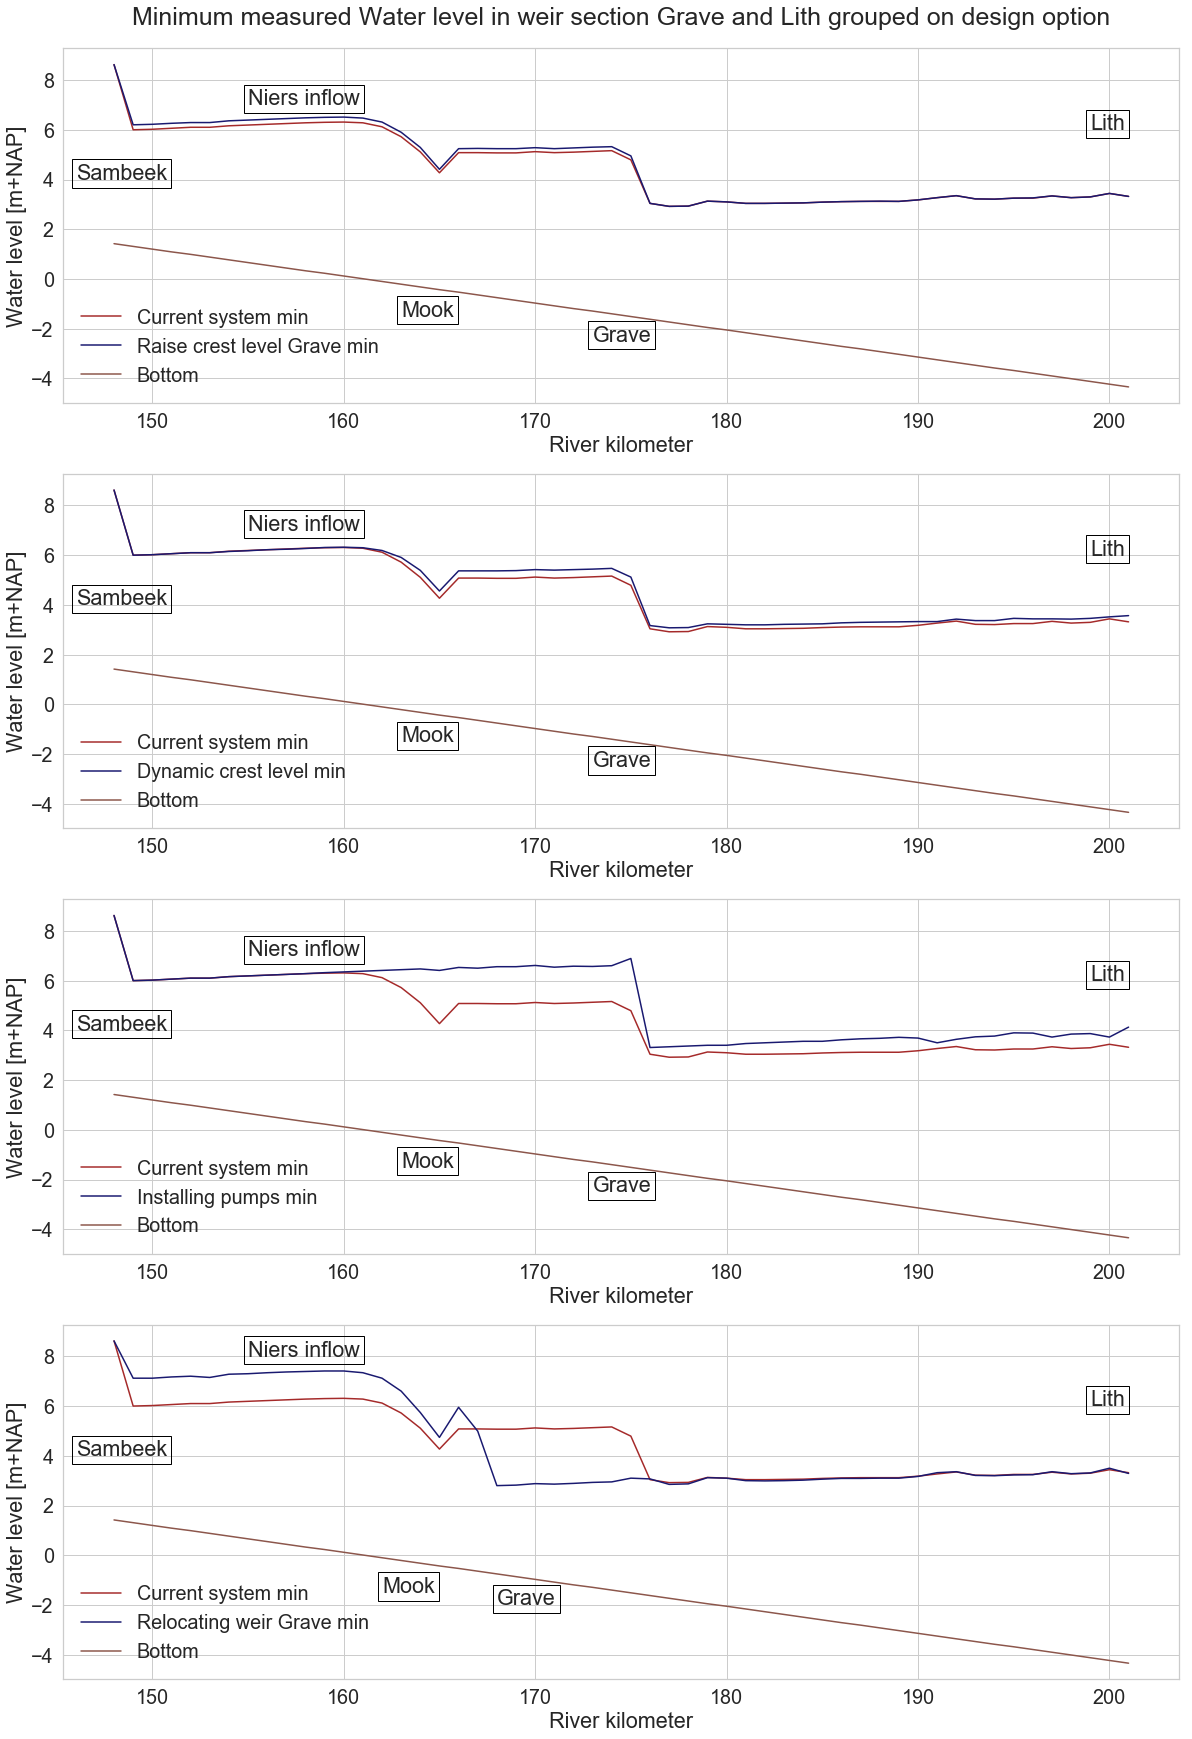

In [227]:
#PLOT WHOLE RIVER MEUSE SECTION

plt.figure(figsize=(20, 30))
x=list(range(first+12,last+12))
sns.set(font_scale=1.8, style='whitegrid')
y1=maxdepth_nopol
y2=mindepth_nopol






plt.subplot(4,1,1)
plt.plot(x,y2,color='brown')
plt.plot(x,mindepth_crest,color='midnightblue' )
plt.plot(x,bottom[first:last],color='tab:brown' )
plt.legend([0,1,2,3,4],labels=['Current system min','Raise crest level Grave min',
                              'Bottom'], loc="lower left", frameon=False)

plt.ylabel('Water level [m+NAP]')
plt.xlabel('River kilometer')
plt.title('Minimum measured Water level in weir section Grave and Lith grouped on design option', fontsize=25, x=0.5, y=1.05)
plt.text(146,4,'Sambeek',      bbox=dict(facecolor='none', edgecolor='black'))
plt.text(155,7,'Niers inflow',bbox=dict(facecolor='none', edgecolor='black'))
plt.text(163,-1.5,'Mook',        bbox=dict(facecolor='none', edgecolor='black'))
plt.text(173,-2.5,'Grave',       bbox=dict(facecolor='none', edgecolor='black'))
plt.text(199,6,'Lith',        bbox=dict(facecolor='none', edgecolor='black'))



plt.subplot(4,1,2)
plt.plot(x,y2,color='brown')
plt.plot(x,mindepth_dyn,color='midnightblue' )
plt.plot(x,bottom[first:last],color='tab:brown' )
plt.legend([0,1,2,3,4],labels=['Current system min',
                              'Dynamic crest level min','Bottom'], loc="lower left", frameon=False)

plt.ylabel('Water level [m+NAP]')
plt.xlabel('River kilometer')
plt.text(146,4,'Sambeek',      bbox=dict(facecolor='none', edgecolor='black'))
plt.text(155,7,'Niers inflow',bbox=dict(facecolor='none', edgecolor='black'))
plt.text(163,-1.5,'Mook',        bbox=dict(facecolor='none', edgecolor='black'))
plt.text(173,-2.5,'Grave',       bbox=dict(facecolor='none', edgecolor='black'))
plt.text(199,6,'Lith',        bbox=dict(facecolor='none', edgecolor='black'))



plt.subplot(4,1,3)
plt.plot(x,y2,color='brown')
plt.plot(x,mindepth_pump,color='midnightblue' )
plt.plot(x,bottom[first:last],color='tab:brown' )
plt.legend([0,1,2,3,4],labels=['Current system min',
                              'Installing pumps min','Bottom'], loc="lower left", frameon=False)

plt.ylabel('Water level [m+NAP]')
plt.xlabel('River kilometer')
plt.text(146,4,'Sambeek',      bbox=dict(facecolor='none', edgecolor='black'))
plt.text(155,7,'Niers inflow',bbox=dict(facecolor='none', edgecolor='black'))
plt.text(163,-1.5,'Mook',        bbox=dict(facecolor='none', edgecolor='black'))
plt.text(173,-2.5,'Grave',       bbox=dict(facecolor='none', edgecolor='black'))
plt.text(199,6,'Lith',        bbox=dict(facecolor='none', edgecolor='black'))


plt.subplot(4,1,4)
plt.plot(x,y2,color='brown')
plt.plot(x,mindepth_reloc,color='midnightblue' )
plt.plot(x,bottom[first:last],color='tab:brown' )
plt.legend([0,1,2,3,4],labels=['Current system min',
                              'Relocating weir Grave min', 'Bottom'], loc="lower left", frameon=False)

plt.ylabel('Water level [m+NAP]')
plt.xlabel('River kilometer')
plt.text(146,4,'Sambeek',      bbox=dict(facecolor='none', edgecolor='black'))
plt.text(155,8,'Niers inflow',bbox=dict(facecolor='none', edgecolor='black'))
plt.text(162,-1.5,'Mook',        bbox=dict(facecolor='none', edgecolor='black'))
plt.text(168,-2,'Grave',       bbox=dict(facecolor='none', edgecolor='black'))
plt.text(199,6,'Lith',        bbox=dict(facecolor='none', edgecolor='black'))

C:\Programs\Anaconda3\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


Text(199,5,'Lith')

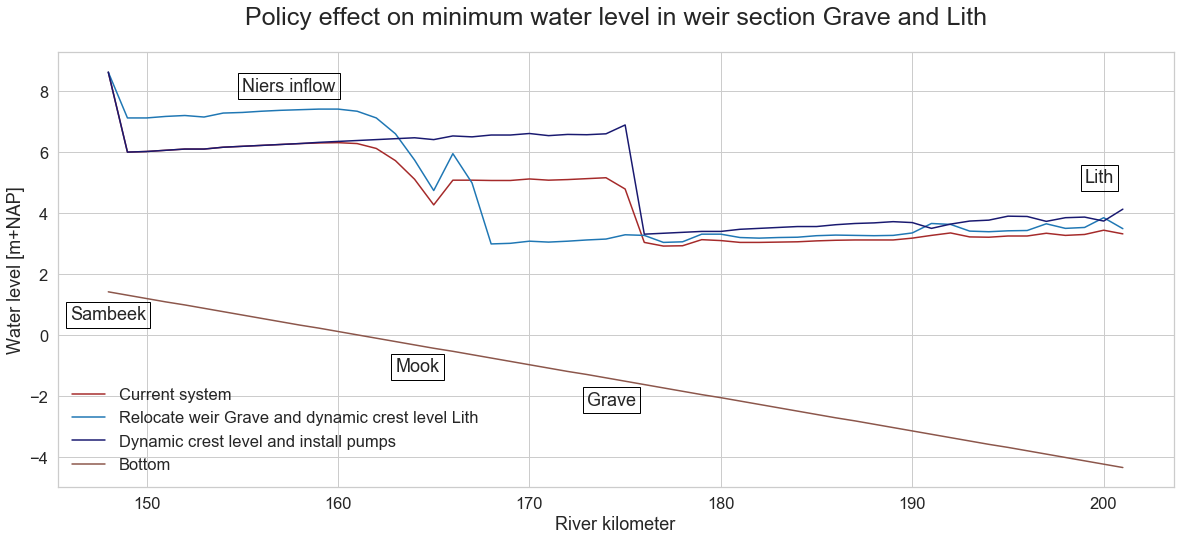

In [203]:
#PLOT COMBINATIONS OF DESIGN OPTIONS

plt.figure(figsize=(20, 8))
x=list(range(first+12,last+12))
sns.set(font_scale=1.5, style='whitegrid')
y1=maxdepth_nopol
y2=mindepth_nopol





plt.plot(x,y2,color='brown')
plt.plot(x,mindepth_relcrest,color='tab:blue')
plt.plot(x,mindepth_dynpump,color='midnightblue' )
plt.plot(x,bottom[first:last],color='tab:brown' )
plt.legend([0,1,2,3,4],labels=['Current system','Relocate weir Grave and dynamic crest level Lith',
                               'Dynamic crest level and install pumps','Bottom'], loc="lower left", frameon=False)

plt.title('Policy effect on minimum water level in weir section Grave and Lith', fontsize=25, x=0.5, y=1.05)
plt.ylabel('Water level [m+NAP]')
plt.xlabel('River kilometer')
plt.text(146,0.5,'Sambeek',      bbox=dict(facecolor='none', edgecolor='black'))
plt.text(155,8,'Niers inflow',bbox=dict(facecolor='none', edgecolor='black'))
plt.text(163,-1.2,'Mook',        bbox=dict(facecolor='none', edgecolor='black'))
plt.text(173,-2.3,'Grave',       bbox=dict(facecolor='none', edgecolor='black'))
plt.text(199,5,'Lith',        bbox=dict(facecolor='none', edgecolor='black'))





# Effect policies on KPI's

In [192]:
policy_keys= pd.Index(['Current system', 'Crest Grave raised', 'Dynamic crest level',
       'Pumps on', 'Levelling restrictions', 'Relocate weir',
       'Relocate weir and raise crest level Lith',
       'Crest level raised and pumps on',
       'Dynamic crest level and pumps on',
       'Crest level raised and levelling restrictions',
       'Dynamic crest level and levelling restrictions',
       'Relocate weir and pumps on',
       'Relocate weir and levelling restrictions'])
policy_keys

Index(['Current system', 'Crest Grave raised', 'Dynamic crest level',
       'Pumps on', 'Levelling restrictions', 'Relocate weir',
       'Relocate weir and raise crest level Lith',
       'Crest level raised and pumps on', 'Dynamic crest level and pumps on',
       'Crest level raised and levelling restrictions',
       'Dynamic crest level and levelling restrictions',
       'Relocate weir and pumps on',
       'Relocate weir and levelling restrictions'],
      dtype='object')

In [187]:
df1= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[0]]
df2= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[1]]
df2.reset_index(drop=True,  inplace=True)
df3= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[2]]
df3.reset_index(drop=True,  inplace=True)
df4= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[3]]
df4.reset_index(drop=True,  inplace=True)
df5= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[4]]
df5.reset_index(drop=True,  inplace=True)
df6= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[5]]
df6.reset_index(drop=True,  inplace=True)
df7= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[6]]
df7.reset_index(drop=True,  inplace=True)
df8= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[7]]
df8.reset_index(drop=True,  inplace=True)
df9= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[8]]
df9.reset_index(drop=True,  inplace=True)
df10= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[9]]
df10.reset_index(drop=True,  inplace=True)
df11= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[10]]
df11.reset_index(drop=True,  inplace=True)
df12= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[11]]
df12.reset_index(drop=True,  inplace=True)
df13= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[12]]
df13.reset_index(drop=True,  inplace=True)

In [204]:
#FRESH WATER BUFFER
fwb = df1.iloc[:,4].to_frame()
fwb.rename(columns = {"Percentage of full fresh water buffer weir section Grave":'Current system'}, inplace=True)
fwb['Crest Grave raised'] = df2.iloc[:,4]
fwb['Dynamic crest level'] = df3.iloc[:,4]
fwb['Pumps on'] = df4.iloc[:,4]
fwb['Levelling restrictions'] = df5.iloc[:,4]
fwb['Relocate weir'] = df6.iloc[:,4]
fwb['Relocate weir and raise crest level Lith'] = df7.iloc[:,4]
fwb['Crest level raised and pumps on'] = df8.iloc[:,4]
fwb['Dynamic crest level and pumps on'] = df9.iloc[:,4]
fwb['Crest level raised and levelling restrictions'] = df10.iloc[:,4]
fwb['Dynamic crest level and levelling restrictions'] = df11.iloc[:,4]
fwb['Relocate weir and pumps on'] = df12.iloc[:,4]
fwb['Relocate weir and levelling restrictions'] = df13.iloc[:,4]

In [205]:
#IC VALUE
ic = df1.iloc[:,17].to_frame()
ic.rename(columns = {'"I/C value at lock"[Weir5]':'Current system'}, inplace=True)
ic['Crest Grave raised'] = df2.iloc[:,17]
ic['Dynamic crest level'] = df3.iloc[:,17]
ic['Pumps on'] = df4.iloc[:,17]
ic['Levelling restrictions'] = df5.iloc[:,17]
ic['Relocate weir'] = df6.iloc[:,17]
ic['Relocate weir and raise crest level Lith'] = df7.iloc[:,17]
ic['Crest level raised and pumps on'] = df8.iloc[:,17]
ic['Dynamic crest level and pumps on'] = df9.iloc[:,17]
ic['Crest level raised and levelling restrictions'] = df10.iloc[:,17]
ic['Dynamic crest level and levelling restrictions'] = df11.iloc[:,17]
ic['Relocate weir and pumps on'] = df12.iloc[:,17]
ic['Relocate weir and levelling restrictions'] = df13.iloc[:,17]

In [236]:
#VELOCITY
vel = df1.iloc[:,11].to_frame()
vel.rename(columns = {'Average velocity through weir section[Weir5]':'Current system'}, inplace=True)
vel['Crest Grave raised'] = df2.iloc[:,11]
vel['Dynamic crest level'] = df3.iloc[:,11]
vel['Pumps on'] = df4.iloc[:,11]
vel['Levelling restrictions'] = df5.iloc[:,11]
vel['Relocate weir'] = df6.iloc[:,11]
vel['Relocate weir and raise crest level Lith'] = df7.iloc[:,11]
vel['Crest level raised and pumps on'] = df8.iloc[:,11]
vel['Dynamic crest level and pumps on'] = df9.iloc[:,11]
vel['Crest level raised and levelling restrictions'] = df10.iloc[:,11]
vel['Dynamic crest level and levelling restrictions'] = df11.iloc[:,11]
vel['Relocate weir and pumps on'] = df12.iloc[:,11]
vel['Relocate weir and levelling restrictions'] = df13.iloc[:,11]

In [207]:
#FRESH WATER BUFFER
desirable0 = 1.05
improved0 = 1.001
decreased0 = 0.999
undesirable0 = 0.98


arr_des=[]
arr_pref=[]
arr_neutral=[]
arr_unwanted=[]
arr_undes=[]
for j in range(13):
    fwb_grav_crest =[]
    for i in range(len(df1)):
        if fwb.iloc[i,j] > desirable0 * fwb.iloc[i,0]:
            fwb_grav_crest.append(5)
        elif fwb.iloc[i,j] > improved0 * fwb.iloc[i,0] and fwb.iloc[i,j] < desirable0 * fwb.iloc[i,0]:
            fwb_grav_crest.append(4)
        elif fwb.iloc[i,j] > decreased0 * fwb.iloc[i,0] and fwb.iloc[i,j] < improved0 * fwb.iloc[i,0]:
            fwb_grav_crest.append(3)
        elif fwb.iloc[i,j] > undesirable0 * fwb.iloc[i,0] and fwb.iloc[i,j] < decreased0 * fwb.iloc[i,0]:
            fwb_grav_crest.append(2)
        elif fwb.iloc[i,j] < undesirable0 * fwb.iloc[i,0]:
            fwb_grav_crest.append(1)
        
    desired = fwb_grav_crest.count(5)
    preferred = fwb_grav_crest.count(4) 
    neutral = fwb_grav_crest.count(3)
    unwanted = fwb_grav_crest.count(2)
    undesired = fwb_grav_crest.count(1)
    
    arr_des.append(desired)
    arr_pref.append(preferred)
    arr_neutral.append(neutral)
    arr_unwanted.append(unwanted)
    arr_undes.append(undesired)

In [208]:
#FRESH WATER BUFFER
desirable1 = 105
improv1 = 101
neutral1 = 99
undesirable1 = 90



arr_des1=[]
arr_improv1=[]
arr_neutral1=[]
arr_unwanted1=[]
arr_undes1=[]
for j in range(13):
    fwb_grav_crest =[]
    for i in range(len(df1)):
        if fwb.iloc[i,j] > desirable1:
            fwb_grav_crest.append(5)
        elif fwb.iloc[i,j] > improv1  and fwb.iloc[i,j] <= desirable1:
            fwb_grav_crest.append(4)
        elif fwb.iloc[i,j] > neutral1  and fwb.iloc[i,j] <= improv1 :
            fwb_grav_crest.append(3)
        elif fwb.iloc[i,j] > undesirable1  and fwb.iloc[i,j] <= neutral1:
            fwb_grav_crest.append(2)
        elif fwb.iloc[i,j] <= undesirable1 :
            fwb_grav_crest.append(1)

    desired =   fwb_grav_crest.count(5)
    improved =  fwb_grav_crest.count(4)
    neutral =   fwb_grav_crest.count(3)
    unwanted =  fwb_grav_crest.count(2)
    undesired = fwb_grav_crest.count(1)
    
    arr_des1.append(desired)
    arr_improv1.append(improved)
    arr_neutral1.append(neutral)
    arr_unwanted1.append(unwanted)
    arr_undes1.append(undesired)

In [209]:
#IC VALUE
desirable = 0.95
improved = 0.98
decreased = 1.02
undesirable = 1.05


ic_des=[]
ic_pref=[]
ic_neutral=[]
ic_unwanted=[]
ic_undes=[]
for j in range(13):
    ic_grav_crest =[]
    for i in range(len(df1)):
        if ic.iloc[i,j] < desirable * ic.iloc[i,0]:
            ic_grav_crest.append(5)
        elif ic.iloc[i,j] < improved * ic.iloc[i,0] and ic.iloc[i,j] > desirable * ic.iloc[i,0]:
            ic_grav_crest.append(4)
        elif ic.iloc[i,j] < decreased * ic.iloc[i,0] and ic.iloc[i,j] > improved * ic.iloc[i,0]:
            ic_grav_crest.append(3)
        elif ic.iloc[i,j] < undesirable * ic.iloc[i,0] and ic.iloc[i,j] > decreased * ic.iloc[i,0]:
            ic_grav_crest.append(2)
        elif ic.iloc[i,j] > undesirable * ic.iloc[i,0]:
            ic_grav_crest.append(1)
        
    desired = ic_grav_crest.count(5)
    preferred = ic_grav_crest.count(4) 
    neutral = ic_grav_crest.count(3)
    unwanted = ic_grav_crest.count(2)
    undesired = ic_grav_crest.count(1)
    
    ic_des.append(desired)
    ic_pref.append(preferred)
    ic_neutral.append(neutral)
    ic_unwanted.append(unwanted)
    ic_undes.append(undesired)


In [237]:
#VELOCITY
desirable = 1.055
improved = 1.02
decreased = 0.98
undesirable = 0.95


vel_des=[]
vel_pref=[]
vel_neutral=[]
vel_unwanted=[]
vel_undes=[]
for j in range(13):
    vel_grav_crest =[]
    for i in range(len(df1)):
        if vel.iloc[i,j] > desirable * vel.iloc[i,0]:
            vel_grav_crest.append(5)
        elif vel.iloc[i,j] > improved * vel.iloc[i,0] and vel.iloc[i,j] < desirable * vel.iloc[i,0]:
            vel_grav_crest.append(4)
        elif vel.iloc[i,j] > decreased * vel.iloc[i,0] and vel.iloc[i,j] < improved * vel.iloc[i,0]:
            vel_grav_crest.append(3)
        elif vel.iloc[i,j] > undesirable * vel.iloc[i,0] and vel.iloc[i,j] < decreased * vel.iloc[i,0]:
            vel_grav_crest.append(2)
        elif vel.iloc[i,j] < undesirable * vel.iloc[i,0]:
            vel_grav_crest.append(1)
        
    desired = vel_grav_crest.count(5)
    preferred = vel_grav_crest.count(4) 
    neutral = vel_grav_crest.count(3)
    unwanted = vel_grav_crest.count(2)
    undesired = vel_grav_crest.count(1)
    
    vel_des.append(desired)
    vel_pref.append(preferred)
    vel_neutral.append(neutral)
    vel_unwanted.append(unwanted)
    vel_undes.append(undesired)

In [211]:
#FRESH WATER BUFFER
barplot = pd.DataFrame({'Underperforming: < 2% of current system': arr_undes,
                       'Deterioration: < current system': arr_unwanted,
                       'Neutral: = current system': arr_neutral,
                       'Improvement: > current system': arr_pref,
                        'Outperforming:> 5% of current system': arr_des
                       })
barplot.set_index(keys=policy_keys,drop=True,inplace=True)
barplot = barplot.iloc[1:,:]

In [212]:
#FRESH WATER BUFFER
barplot_fwb = pd.DataFrame({'Undesired: Fresh water buffer < 90% ': arr_undes1,
                        'Risky: 90% < Fresh water buffer < 99%': arr_unwanted1,
                        'Neutral: 99% < Fresh water buffer < 101% ': arr_neutral1,
                        'Improved: 101% < Fresh water buffer < 105%': arr_improv1,
                        'Desired: Fresh water buffer > 105%': arr_des1
                       })
barplot_fwb.set_index(keys=policy_keys,drop=True,inplace=True)

In [213]:
#IC VALUE
barplot_ic = pd.DataFrame({'Underperforming: > 5% of current system': ic_undes,
                       'Deterioration: > 2% of current system': ic_unwanted,
                       'Neutral: = current system': ic_neutral,
                       'Improvement: < 2% of current system': ic_pref,
                        'Outperforming: < 5% of current system': ic_des
                       })
barplot_ic.set_index(keys=policy_keys,drop=True,inplace=True)
barplot_ic = barplot_ic.iloc[1:,:]


In [238]:
#VELOCITY
barplot_vel = pd.DataFrame({'Underperforming: > 5% of current system': vel_undes,
                       'Deterioration: > 2% of current system': vel_unwanted,
                       'Neutral: = current system': vel_neutral,
                       'Improvement: < 2% of current system': vel_pref,
                        'Outperforming: < 5% of current system': vel_des
                       })
barplot_vel.set_index(keys=policy_keys,drop=True,inplace=True)
barplot_vel = barplot_vel.iloc[1:,:]

In [215]:
sns.set(font_scale=1.3, style='white')

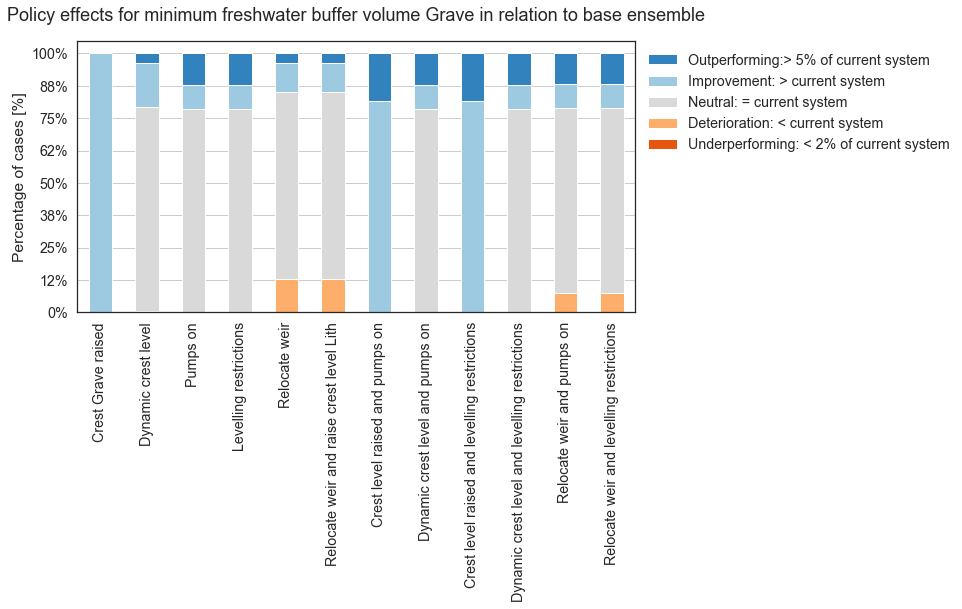

In [216]:
#FRESH WATER BUFFER
palette = sns.color_palette('tab20c')
color_values = ([palette[4],palette[6], palette[19], palette[2],palette[0]])

g = barplot.plot(kind='bar', stacked=True, color=color_values,figsize=(10,5))
handles, labels = g.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels),loc = 2, bbox_to_anchor = (1,1), frameon=False)
plt.title('Policy effects for minimum freshwater buffer volume Grave in relation to base ensemble', fontsize=18, y=1.05)
plt.ylabel('Percentage of cases [%]')
g.yaxis.set_major_formatter(mtick.PercentFormatter(8000))
g.grid(axis='y')

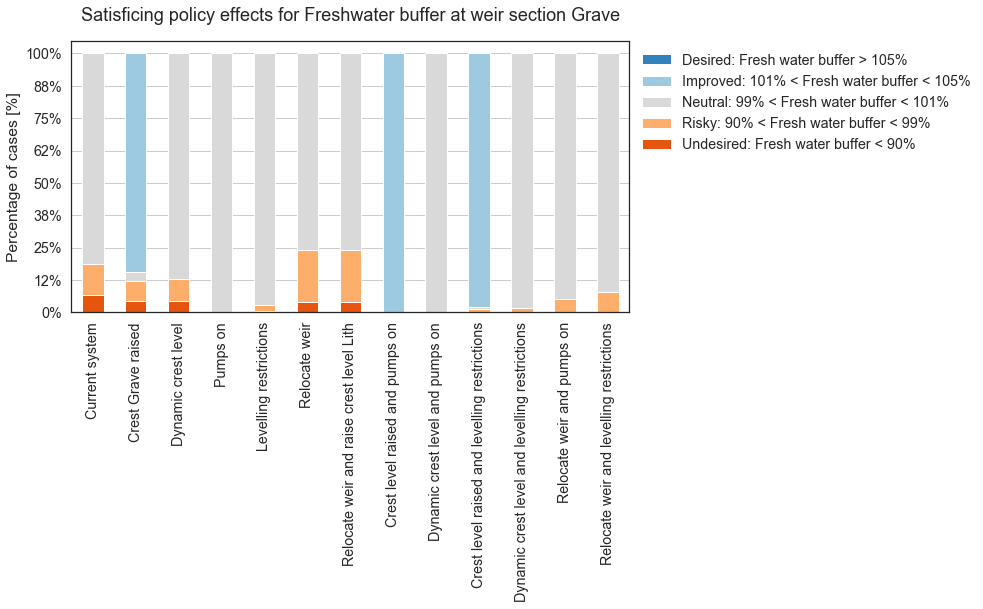

In [194]:
#FRESH WATER BUFFER
palette = sns.color_palette('tab20c')
color_values = ([palette[4],palette[6], palette[19], palette[2], palette[0]])

g = barplot_fwb.plot(kind='bar', stacked=True, color=color_values,figsize=(10,5))
handles, labels = g.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels),loc = 2, bbox_to_anchor = (1,1), frameon=False)
plt.title('Satisficing policy effects for Freshwater buffer at weir section Grave', fontsize=18, y=1.05)
plt.ylabel('Percentage of cases [%]')
g.yaxis.set_major_formatter(mtick.PercentFormatter(8000))
g.grid(axis='y')

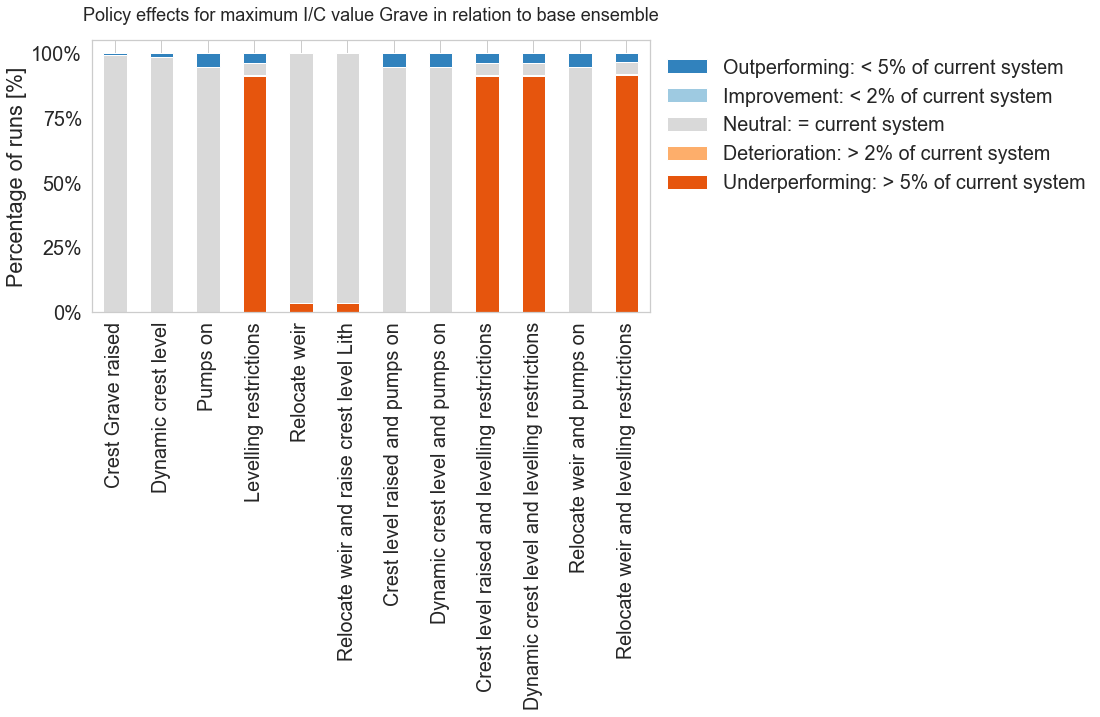

In [228]:
#IC VALUE
palette = sns.color_palette('tab20c')
color_values = ([palette[4],palette[6], palette[19], palette[2],palette[0]])

g = barplot_ic.plot(kind='bar', stacked=True, color=color_values,figsize=(10,5))
handles, labels = g.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels),loc = 2, bbox_to_anchor = (1,1), frameon=False)
plt.title('Policy effects for maximum I/C value Grave in relation to base ensemble', fontsize=18, y=1.05)
plt.ylabel('Percentage of runs [%]')
g.yaxis.set_major_formatter(mtick.PercentFormatter(8000))
g.grid(axis='y')

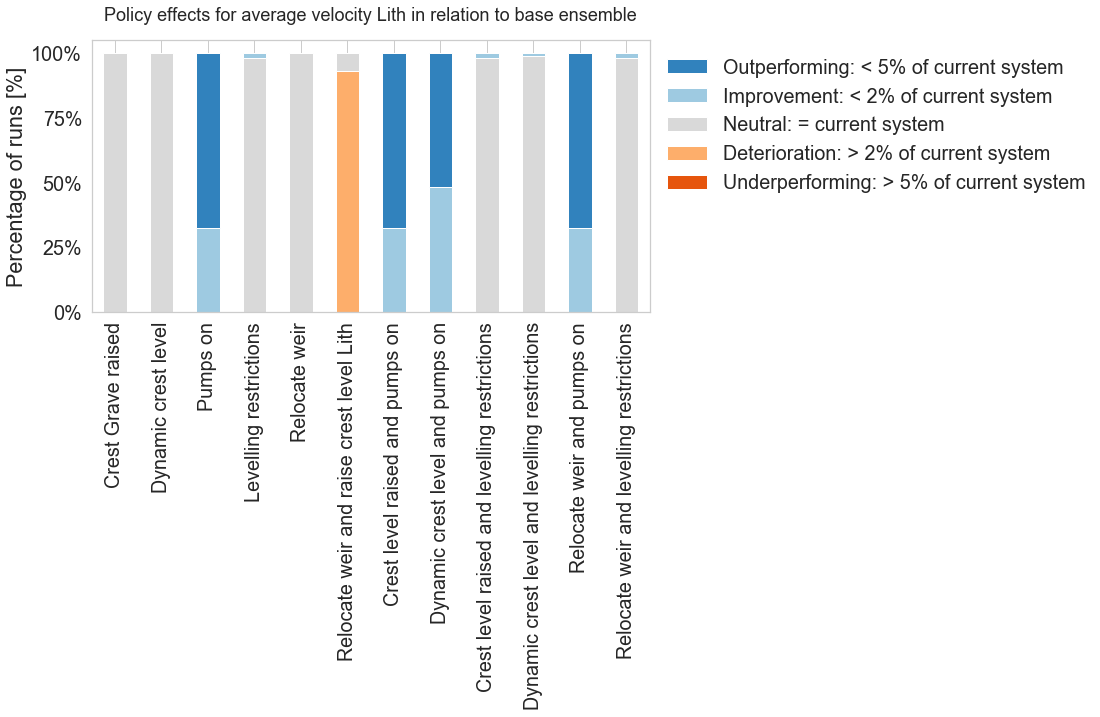

In [239]:
#VELOCITY
palette = sns.color_palette('tab20c')
color_values = ([palette[4],palette[6], palette[19], palette[2],palette[0]])

g = barplot_vel.plot(kind='bar', stacked=True, color=color_values,figsize=(10,5))
handles, labels = g.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels),loc = 2, bbox_to_anchor = (1,1), frameon=False)
plt.title('Policy effects for average velocity Lith in relation to base ensemble', fontsize=18, y=1.05)
plt.ylabel('Percentage of runs [%]')
g.yaxis.set_major_formatter(mtick.PercentFormatter(8000))
g.grid(axis='y')

# Visualization statistical regret

Make dataframe with smallest 1% fresh water buffers and standard deviation

In [181]:
df1= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[0]]
df2= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[1]]
df3= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[2]]
df4= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[3]]
df5= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[4]]
df6= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[5]]
df7= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[6]]
df8= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[7]]
df9= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[8]]
df10= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[9]]
df11= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[10]]
df12= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[11]]
df13= df_outcome[df_outcome['policy'] ==df_outcome['policy'].unique()[12]]


In [182]:
percent=int(len(df1.iloc[:,0])*0.01)
df_1= df1.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_2= df2.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_3= df3.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_4= df4.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_5= df5.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_6= df6.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_7= df7.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_8= df8.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_9= df9.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_10= df10.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_11= df11.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_12= df12.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_13= df13.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T

In [183]:
min_fwb_grave = pd.concat([df_2,df_10,df_8,df_3,df_11,df_9,df_5,df_1,df_4,df_6,df_13,df_12,df_7]).reset_index(drop=True)

In [184]:
percent=int(len(df1.iloc[:,0])*0.01)
df_1= df1.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_2= df2.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_3= df3.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_4= df4.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_5= df5.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_6= df6.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_7= df7.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_8= df8.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_9= df9.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_10= df10.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_11= df11.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_12= df12.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T
df_13= df13.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Lith').mean().to_frame().T

In [185]:
min_fwb_lith = pd.concat([df_2,df_10,df_8,df_3,df_11,df_9,df_5,df_1,df_4,df_6,df_13,df_12,df_7]).reset_index(drop=True)

In [186]:
std_fwb_grave = df_outcome.groupby('policy').std()

In [187]:
scatter = pd.DataFrame(std_fwb_grave.iloc[:,4])
scatter.rename(columns = {"Percentage of full fresh water buffer weir section Grave":'Freshwater buffer standard deviation Grave [%]'}, inplace=True)
scatter['Minimum freshwater buffer Grave [%]'] = min_fwb_grave.iloc[:,4].tolist()
scatter = scatter.reset_index()

Make dataframe containing max 1% values grouped on policy

In [194]:
df_1= df1.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_2= df2.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_3= df3.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_4= df4.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_5= df5.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_6= df6.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_7= df7.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_8= df8.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_9= df9.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_10= df10.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_11= df11.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_12= df12.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
df_13= df13.nlargest(percent,columns='Percentage of full fresh water buffer weir section Grave').mean().to_frame().T
max_ic_grave = pd.concat([df_2,df_10,df_8,df_3,df_11,df_9,df_5,df_1,df_4,df_6,df_13,df_12,df_7]).reset_index(drop=True)

In [228]:
perc=800
df_1= df1.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_2= df2.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_3= df3.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_4= df4.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_5= df5.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_6= df6.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_7= df7.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_8= df8.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_9= df9.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_10= df10.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_11= df11.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_12= df12.nlargest(perc,columns='Days of free flow').mean().to_frame().T
df_13= df13.nlargest(perc,columns='Days of free flow').mean().to_frame().T
max_freeflow = pd.concat([df_2,df_10,df_8,df_3,df_11,df_9,df_5,df_1,df_4,df_6,df_13,df_12,df_7]).reset_index(drop=True)
max_freeflow_day = max_freeflow.iloc[:,6]

In [229]:
max_ic = max_ic_grave.iloc[:,17]
scatter['Max I/C value at lock Grave [-]'] = max_ic

Make dataframe containing mean values grouped on policy

In [230]:
meanval = df_outcome.groupby('policy').mean()
df_mean = pd.DataFrame(meanval.iloc[:,11])
df_mean.rename(columns = {"Average velocity through weir section[Weir5]":'Average velocity Grave [m/s]'}, inplace=True)
df_mean['Days of free flow [Day]'] = meanval.iloc[:,7].tolist()
df_mean['Mean freshwater buffer Grave [%]'] = meanval.iloc[:,4].tolist()
df_mean = df_mean.reset_index()

In [231]:
scatter['Average velocity Grave [m/s]'] = df_mean['Average velocity Grave [m/s]']
scatter['Days of free flow [Day]'] = max_freeflow_day
scatter['Mean freshwater buffer Grave [%]'] = df_mean['Mean freshwater buffer Grave [%]']
scatter['Minimum freshwater buffer Lith [%]'] = min_fwb_lith.iloc[:,5].tolist()

In [232]:
scatter_all=scatter
scatter_all

,policy,Freshwater buffer standard deviation Grave [%],Minimum freshwater buffer Grave [%],Max I/C value at lock Grave [-],Average velocity Grave [m/s],Days of free flow [Day],Mean freshwater buffer Grave [%],Minimum freshwater buffer Lith [%]
0,Crest Grave raised,4.745332,75.710360,0.397309,0.262963,14.066172,102.117088,75.937873
1,Crest level raised and levelling restrictions,1.183351,93.551404,0.542450,0.264026,14.066172,103.707318,95.685881
2,Crest level raised and pumps on,0.125865,103.149366,0.391977,0.279425,14.066172,103.874715,96.675006
3,Dynamic crest level,3.731866,76.090431,0.396685,0.267027,14.066172,98.964848,79.582773
4,Dynamic crest level and levelling restrictions,0.811857,92.933064,0.547691,0.267879,14.066172,100.002201,96.161111
5,Dynamic crest level and pumps on,0.090666,99.521457,0.391963,0.283454,14.066172,100.089710,96.675006
6,Levelling restrictions,1.138239,90.115401,0.544425,0.269943,14.066172,99.930755,95.685490
7,No policy,4.588395,72.763608,0.398571,0.268863,14.066172,98.400349,75.907601
8,Pumps on,0.090666,99.521457,0.391963,0.285700,14.066172,100.089710,96.675006
9,Relocate weir,3.238147,81.497681,0.401002,0.268615,14.066172,98.692161,75.374176


In [233]:
scatter = scatter.drop([1,1])
scatter = scatter.drop([2,2])
scatter = scatter.drop([4,4])
scatter = scatter.drop([5,5])
scatter = scatter.drop([10,10])
scatter = scatter.drop([11,11])
scatter = scatter.drop([12,12]).reset_index(drop=True)
scatter

,policy,Freshwater buffer standard deviation Grave [%],Minimum freshwater buffer Grave [%],Max I/C value at lock Grave [-],Average velocity Grave [m/s],Days of free flow [Day],Mean freshwater buffer Grave [%],Minimum freshwater buffer Lith [%]
0,Crest Grave raised,4.745332,75.710360,0.397309,0.262963,14.066172,102.117088,75.937873
1,Dynamic crest level,3.731866,76.090431,0.396685,0.267027,14.066172,98.964848,79.582773
2,Levelling restrictions,1.138239,90.115401,0.544425,0.269943,14.066172,99.930755,95.685490
3,No policy,4.588395,72.763608,0.398571,0.268863,14.066172,98.400349,75.907601
4,Pumps on,0.090666,99.521457,0.391963,0.285700,14.066172,100.089710,96.675006
5,Relocate weir,3.238147,81.497681,0.401002,0.268615,14.066172,98.692161,75.374176


In [234]:
scatter_combi = scatter_all.iloc[7,:].to_frame().T
a=scatter_all.iloc[5,:].to_frame().T
b=scatter_all.iloc[12,:].to_frame().T
scatter_combi = scatter_combi.append(a)
scatter_combi = scatter_combi.append(b).reset_index(drop=True)

Create Regret based robustness metric

In [237]:
g = scatter.iloc[:,0]
b = (scatter.iloc[:,2] - scatter.iloc[3,2]).to_frame().round(2)
c = (scatter.iloc[:,3] - scatter.iloc[3,3]).to_frame().round(2)
d = (scatter.iloc[:,4] - scatter.iloc[3,4]).to_frame().round(2)
e = pd.DataFrame({ 'Days of free flow [Day]' :['-','-','-','-','-','-']})
f = (scatter.iloc[:,6] - scatter.iloc[3,6]).to_frame().round(2)

scatter_regret = pd.concat([b,c,d,e,f], axis=1)
scatter_regret = scatter_regret.set_index(g, drop=True)
scatter_regret = scatter_regret.drop('No policy')
scatter_regret

,Minimum freshwater buffer Grave [%],Max I/C value at lock Grave [-],Average velocity Grave [m/s],Days of free flow [Day],Mean freshwater buffer Grave [%]
policy,,,,,
Crest Grave raised,2.95,-0.00,-0.01,-,3.72
Dynamic crest level,3.33,-0.00,-0.00,-,0.56
Levelling restrictions,17.35,0.15,0.00,-,1.53
Pumps on,26.76,-0.01,0.02,-,1.69
Relocate weir,8.73,0.00,-0.00,-,0.29


In [238]:
scatter

,policy,Freshwater buffer standard deviation Grave [%],Minimum freshwater buffer Grave [%],Max I/C value at lock Grave [-],Average velocity Grave [m/s],Days of free flow [Day],Mean freshwater buffer Grave [%],Minimum freshwater buffer Lith [%]
0,Crest Grave raised,4.745332,75.710360,0.397309,0.262963,14.066172,102.117088,75.937873
1,Dynamic crest level,3.731866,76.090431,0.396685,0.267027,14.066172,98.964848,79.582773
2,Levelling restrictions,1.138239,90.115401,0.544425,0.269943,14.066172,99.930755,95.685490
3,No policy,4.588395,72.763608,0.398571,0.268863,14.066172,98.400349,75.907601
4,Pumps on,0.090666,99.521457,0.391963,0.285700,14.066172,100.089710,96.675006
5,Relocate weir,3.238147,81.497681,0.401002,0.268615,14.066172,98.692161,75.374176


Make plots

Text(0,0.5,'Max I/C value at lock [-]')

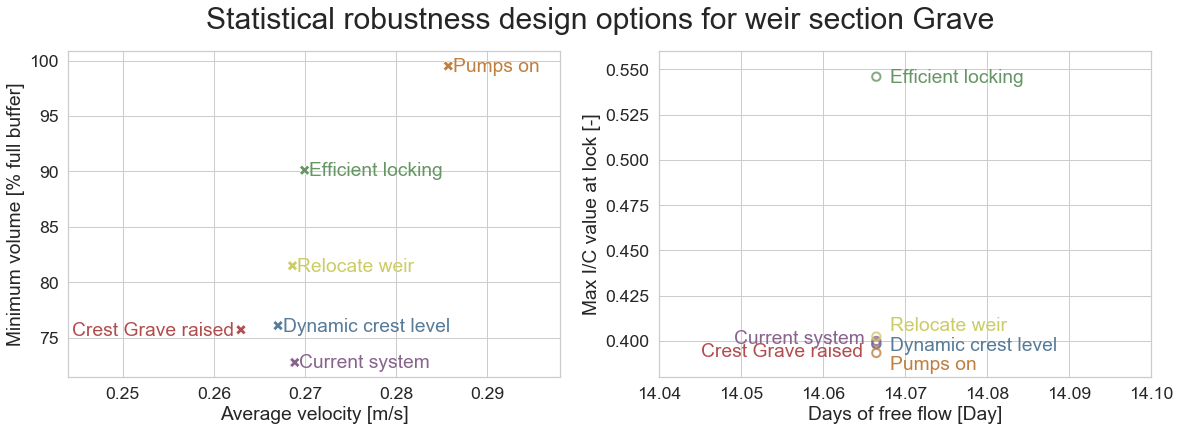

In [265]:
plt.figure(figsize = (30,6))
sns.set(font_scale=1.6, style='whitegrid')
clr_palette = sns.color_palette("Set1",6, desat=0.5)


plt.subplot(1,3,1)
g = sns.scatterplot(data=scatter, x='Average velocity Grave [m/s]', y='Minimum freshwater buffer Grave [%]', hue='policy',s=110, palette=clr_palette,
                    marker="X", legend=False)
plt.title('Statistical robustness design options for weir section Grave', fontsize=30, x=1.08, y=1.05)

a=+0.0005
b=-0.5
g.text(scatter.iloc[0,4]-0.0185 ,scatter.iloc[0,2]+b ,'Crest Grave raised', color=clr_palette[0])
g.text(scatter.iloc[1,4]+a ,scatter.iloc[1,2]+b ,'Dynamic crest level', color=clr_palette[1])
g.text(scatter.iloc[2,4]+a ,scatter.iloc[2,2]+b ,'Efficient locking', color=clr_palette[2])
g.text(scatter.iloc[3,4]+a ,scatter.iloc[3,2]+b ,'Current system', color=clr_palette[3])
g.text(scatter.iloc[4,4]+a ,scatter.iloc[4,2]+b ,'Pumps on', color=clr_palette[4])
g.text(scatter.iloc[5,4]+a ,scatter.iloc[5,2]+b ,'Relocate weir', color=clr_palette[5])
plt.xlim(0.244,0.298)
plt.ylabel('Minimum volume [% full buffer]')
plt.xlabel('Average velocity [m/s]')


plt.subplot(1,3,2)
s = sns.scatterplot(data=scatter, x='Days of free flow [Day]', y='Max I/C value at lock Grave [-]', 
                    hue='policy',s=250, alpha=0.8 , palette=clr_palette, marker="$\circ$", legend=False, linewidth=0.1)#$\circ$

a1=+0.002
b1=-0.002
s.text(scatter.iloc[0,5]-0.021 ,scatter.iloc[0,3]-0.006 ,'Crest Grave raised', color=clr_palette[0])
s.text(scatter.iloc[1,5]+a1 ,scatter.iloc[1,3]+b1 ,'Dynamic crest level', color=clr_palette[1])
s.text(scatter.iloc[2,5]+a1 ,scatter.iloc[2,3]+b1 ,'Efficient locking', color=clr_palette[2])
s.text(scatter.iloc[3,5]-0.017 ,scatter.iloc[3,3]+0 ,'Current system', color=clr_palette[3])
s.text(scatter.iloc[4,5]+a1 ,scatter.iloc[4,3]-0.008 ,'Pumps on', color=clr_palette[4])
s.text(scatter.iloc[5,5]+a1 ,scatter.iloc[5,3]+0.005 ,'Relocate weir', color=clr_palette[5])
plt.ylim(0.38,0.56)
plt.xlim(14.04,14.1)
plt.ylabel('Max I/C value at lock [-]')



Text(0.5,0,'Standard deviation [% full buffer]')

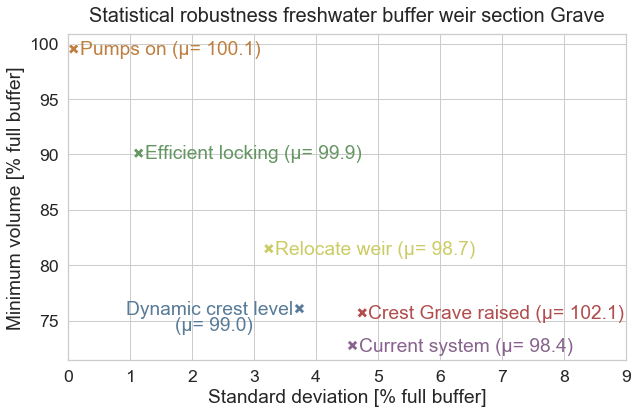

In [260]:
plt.figure(figsize = (10,6))

g = sns.scatterplot(data=scatter, x='Freshwater buffer standard deviation Grave [%]', y='Minimum freshwater buffer Grave [%]', hue='policy',s=110, palette=clr_palette,
                    marker="X", legend=False)
plt.title('Statistical robustness freshwater buffer weir section Grave', fontsize=20, y=1.02)

a=+0.1
b=-0.5
g.text(scatter.iloc[0,1]+a ,scatter.iloc[0,2]+b ,'Crest Grave raised (μ= %s)' % (round(scatter.iloc[0,6],1)), color=clr_palette[0])
g.text(scatter.iloc[1,1]-2.8 ,scatter.iloc[1,2]+b ,'Dynamic crest level' , color=clr_palette[1])
g.text(scatter.iloc[1,1]-2 ,scatter.iloc[1,2]-2 ,'(μ= %s)' % (round(scatter.iloc[1,6],1)), color=clr_palette[1])
g.text(scatter.iloc[2,1]+a ,scatter.iloc[2,2]+b ,'Efficient locking (μ= %s)' % (round(scatter.iloc[2,6],1)), color=clr_palette[2])
g.text(scatter.iloc[3,1]+a ,scatter.iloc[3,2]+b ,'Current system (μ= %s)' % (round(scatter.iloc[3,6],1)), color=clr_palette[3])
g.text(scatter.iloc[4,1]+a ,scatter.iloc[4,2]+b ,'Pumps on (μ= %s)' % (round(scatter.iloc[4,6],1)), color=clr_palette[4])
g.text(scatter.iloc[5,1]+a ,scatter.iloc[5,2]+b ,'Relocate weir (μ= %s)' % (round(scatter.iloc[5,6],1)), color=clr_palette[5])
plt.xlim(0,9)
plt.ylabel('Minimum volume [% full buffer]')
plt.xlabel('Standard deviation [% full buffer]')

Text(0.5,0,'Minimum volume Grave [% full buffer]')

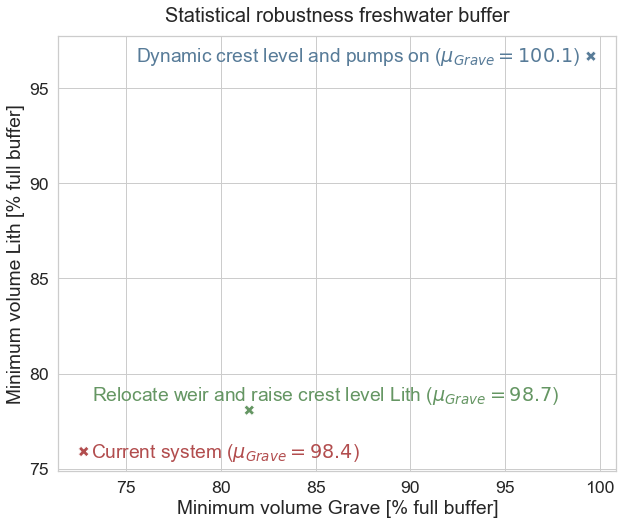

In [263]:
clr_palette = sns.color_palette("Set1",3, desat=0.5)
plt.figure(figsize = (10,8))


g = sns.scatterplot(data=scatter_combi, x='Minimum freshwater buffer Grave [%]', 
                    y='Minimum freshwater buffer Lith [%]', hue='policy',
                    s=110, palette=clr_palette,marker="X", legend=False)
plt.title('Statistical robustness freshwater buffer', fontsize=20, y=1.02)

a=+0.4
b=-0.3
g.text(scatter_combi.iloc[0,2]+a ,scatter_combi.iloc[0,7]+b ,'Current system ($μ_{Grave}= %s$)' % (round(scatter_combi.iloc[0,6],1)), color=clr_palette[0])
g.text(scatter_combi.iloc[1,2]-24 ,scatter_combi.iloc[1,7]+b ,'Dynamic crest level and pumps on ($μ_{Grave}= %s$)' % (round(scatter_combi.iloc[1,6],1)) , color=clr_palette[1])
g.text(scatter_combi.iloc[2,2]-8.3 ,scatter_combi.iloc[2,7]+0.5 ,'Relocate weir and raise crest level Lith ($μ_{Grave}= %s$)' % (round(scatter_combi.iloc[2,6],1)), color=clr_palette[2])
plt.ylabel('Minimum volume Lith [% full buffer]')
plt.xlabel('Minimum volume Grave [% full buffer]')


# KDE Plot

In [278]:
df_1= df1.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_2= df2.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_3= df3.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_4= df4.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_5= df5.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_6= df6.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_7= df7.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_8= df8.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_9= df9.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_10= df10.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_11= df11.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_12= df12.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')
df_13= df13.nsmallest(percent,columns='Percentage of full fresh water buffer weir section Grave')

In [279]:
fwb_grave = pd.concat([df_2,df_10,df_8,df_3,df_11,df_9,df_5,df_1,df_4,df_6,df_13,df_12,df_7]).reset_index(drop=True)

In [280]:
fwb_grave.rename(columns = {'Percentage of full fresh water buffer weir section Grave':'Fresh water buffer Grave [%]'}, inplace=True)
fwb_grave.rename(columns = {'Percentage of full fresh water buffer weir section Lith':'Fresh water buffer Lith [%]'}, inplace=True)
df_outcome.rename(columns = {'Average velocity through weir section[Weir5]':'Average velocity Grave [m/s]'}, inplace=True)
df_outcome.rename(columns = {'"I/C value at lock"[Weir5]':'I/C value at lock Grave [-]'}, inplace=True)
df_outcome.rename(columns = {'Days of free flow':'Days of free flow [Days]'}, inplace=True)

In [281]:
df_outcome['policy'].unique()

array(['No policy', 'Crest Grave raised', 'Dynamic crest level',
       'Pumps on', 'Levelling restrictions', 'Relocate weir',
       'Relocate weir and raise crest level Lith',
       'Crest level raised and pumps on',
       'Dynamic crest level and pumps on',
       'Crest level raised and levelling restrictions',
       'Dynamic crest level and levelling restrictions',
       'Relocate weir and pumps on',
       'Relocate weir and levelling restrictions'], dtype=object)

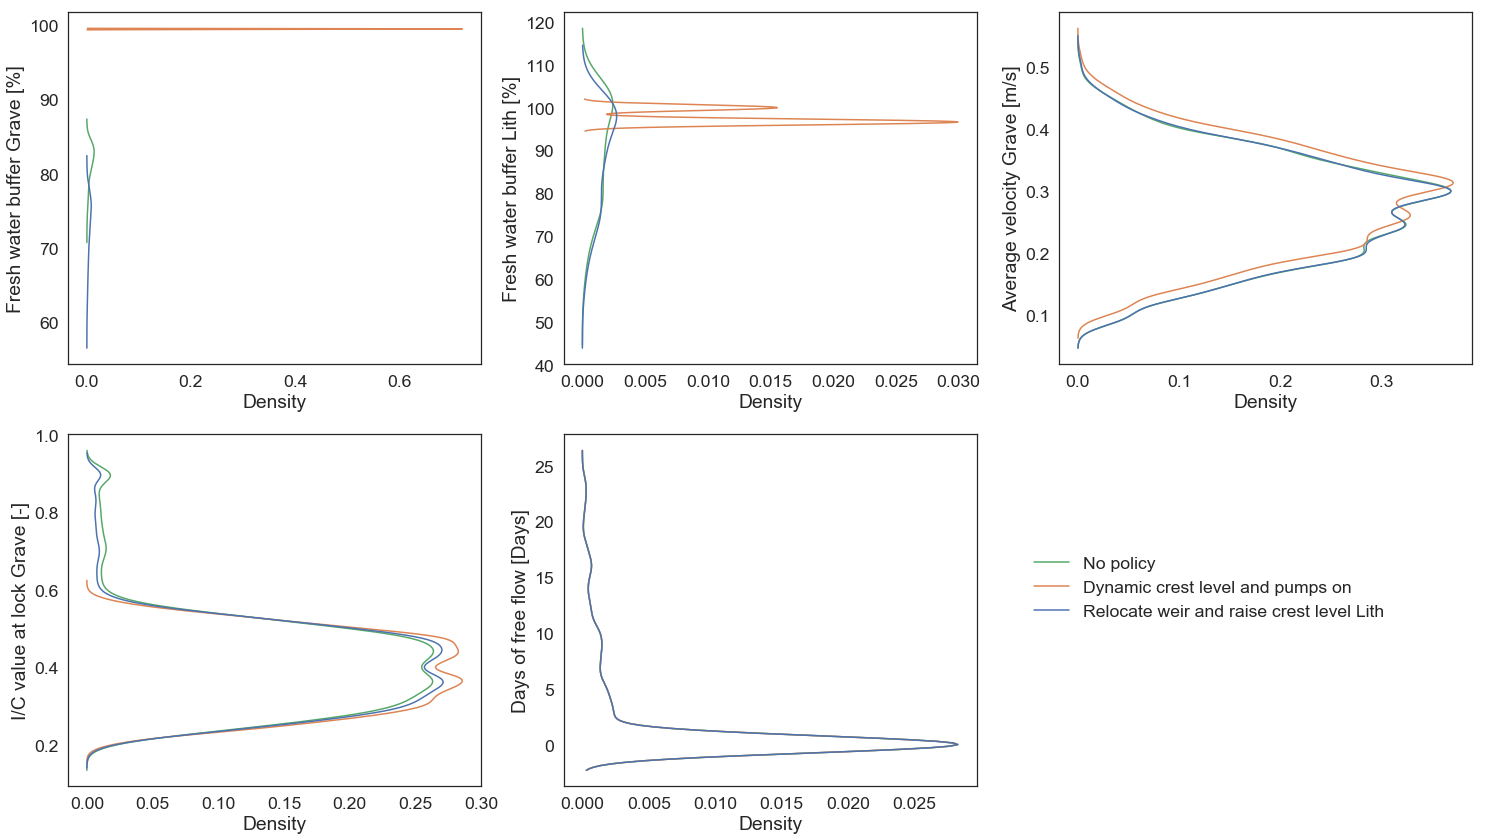

In [346]:
clr_palette = sns.color_palette("Set2",8)
plt.figure(figsize=(20, 10))
pol_to_show =['No policy', 'Dynamic crest level and pumps on', 'Relocate weir and raise crest level Lith']


plt.subplot(2,3,1)
a=sns.kdeplot(data=fwb_grave, y='Fresh water buffer Grave [%]', hue='policy', hue_order=pol_to_show, legend=False )


plt.subplot(2,3,2)
b=sns.kdeplot(data=fwb_grave, y='Fresh water buffer Lith [%]', hue='policy', hue_order=pol_to_show, legend=False)

plt.subplot(2,3,3)
c=sns.kdeplot(data=df_outcome, y='Average velocity Grave [m/s]', hue='policy', hue_order=pol_to_show, legend=False)

plt.subplot(2,3,4)
d=sns.kdeplot(data=df_outcome, y='I/C value at lock Grave [-]', hue='policy', hue_order=pol_to_show, legend=False)

plt.subplot(2,3,5)
e=sns.kdeplot(data=df_outcome, y='Days of free flow [Days]', hue='policy', hue_order=pol_to_show)
#e.legend(bbox_to_anchor=(1.2,1), fontsize=15)
plt.legend(labels=pol_to_show, loc = 2, bbox_to_anchor = (1.1,0.7), frameon=False)

plt.subplots_adjust(left=None, bottom=None, right=1.1, top=1.2, wspace=None, hspace=None)

# Pair plot

In [20]:
outcome=[
'Percentage of full fresh water buffer weir section Grave',
'Average velocity through weir section[Weir5]',
'"I/C value at lock"[Weir5]',
'Days of free flow'
]
outcome


def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

In [21]:
pol = df_outcome['policy'].unique()
pol

array(['No policy', 'Crest Grave raised', 'Dynamic crest level',
       'Pumps on', 'Levelling restrictions', 'Relocate weir',
       'Relocate weir and raise crest level Lith',
       'Crest level raised and pumps on',
       'Dynamic crest level and pumps on',
       'Crest level raised and levelling restrictions',
       'Dynamic crest level and levelling restrictions',
       'Relocate weir and pumps on',
       'Relocate weir and levelling restrictions'], dtype=object)

In [19]:
outcome =['Percentage of full fresh water buffer weir section Grave',
'Percentage of full fresh water buffer weir section Lith',
'Average velocity through weir section[Weir6]'
         ]

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


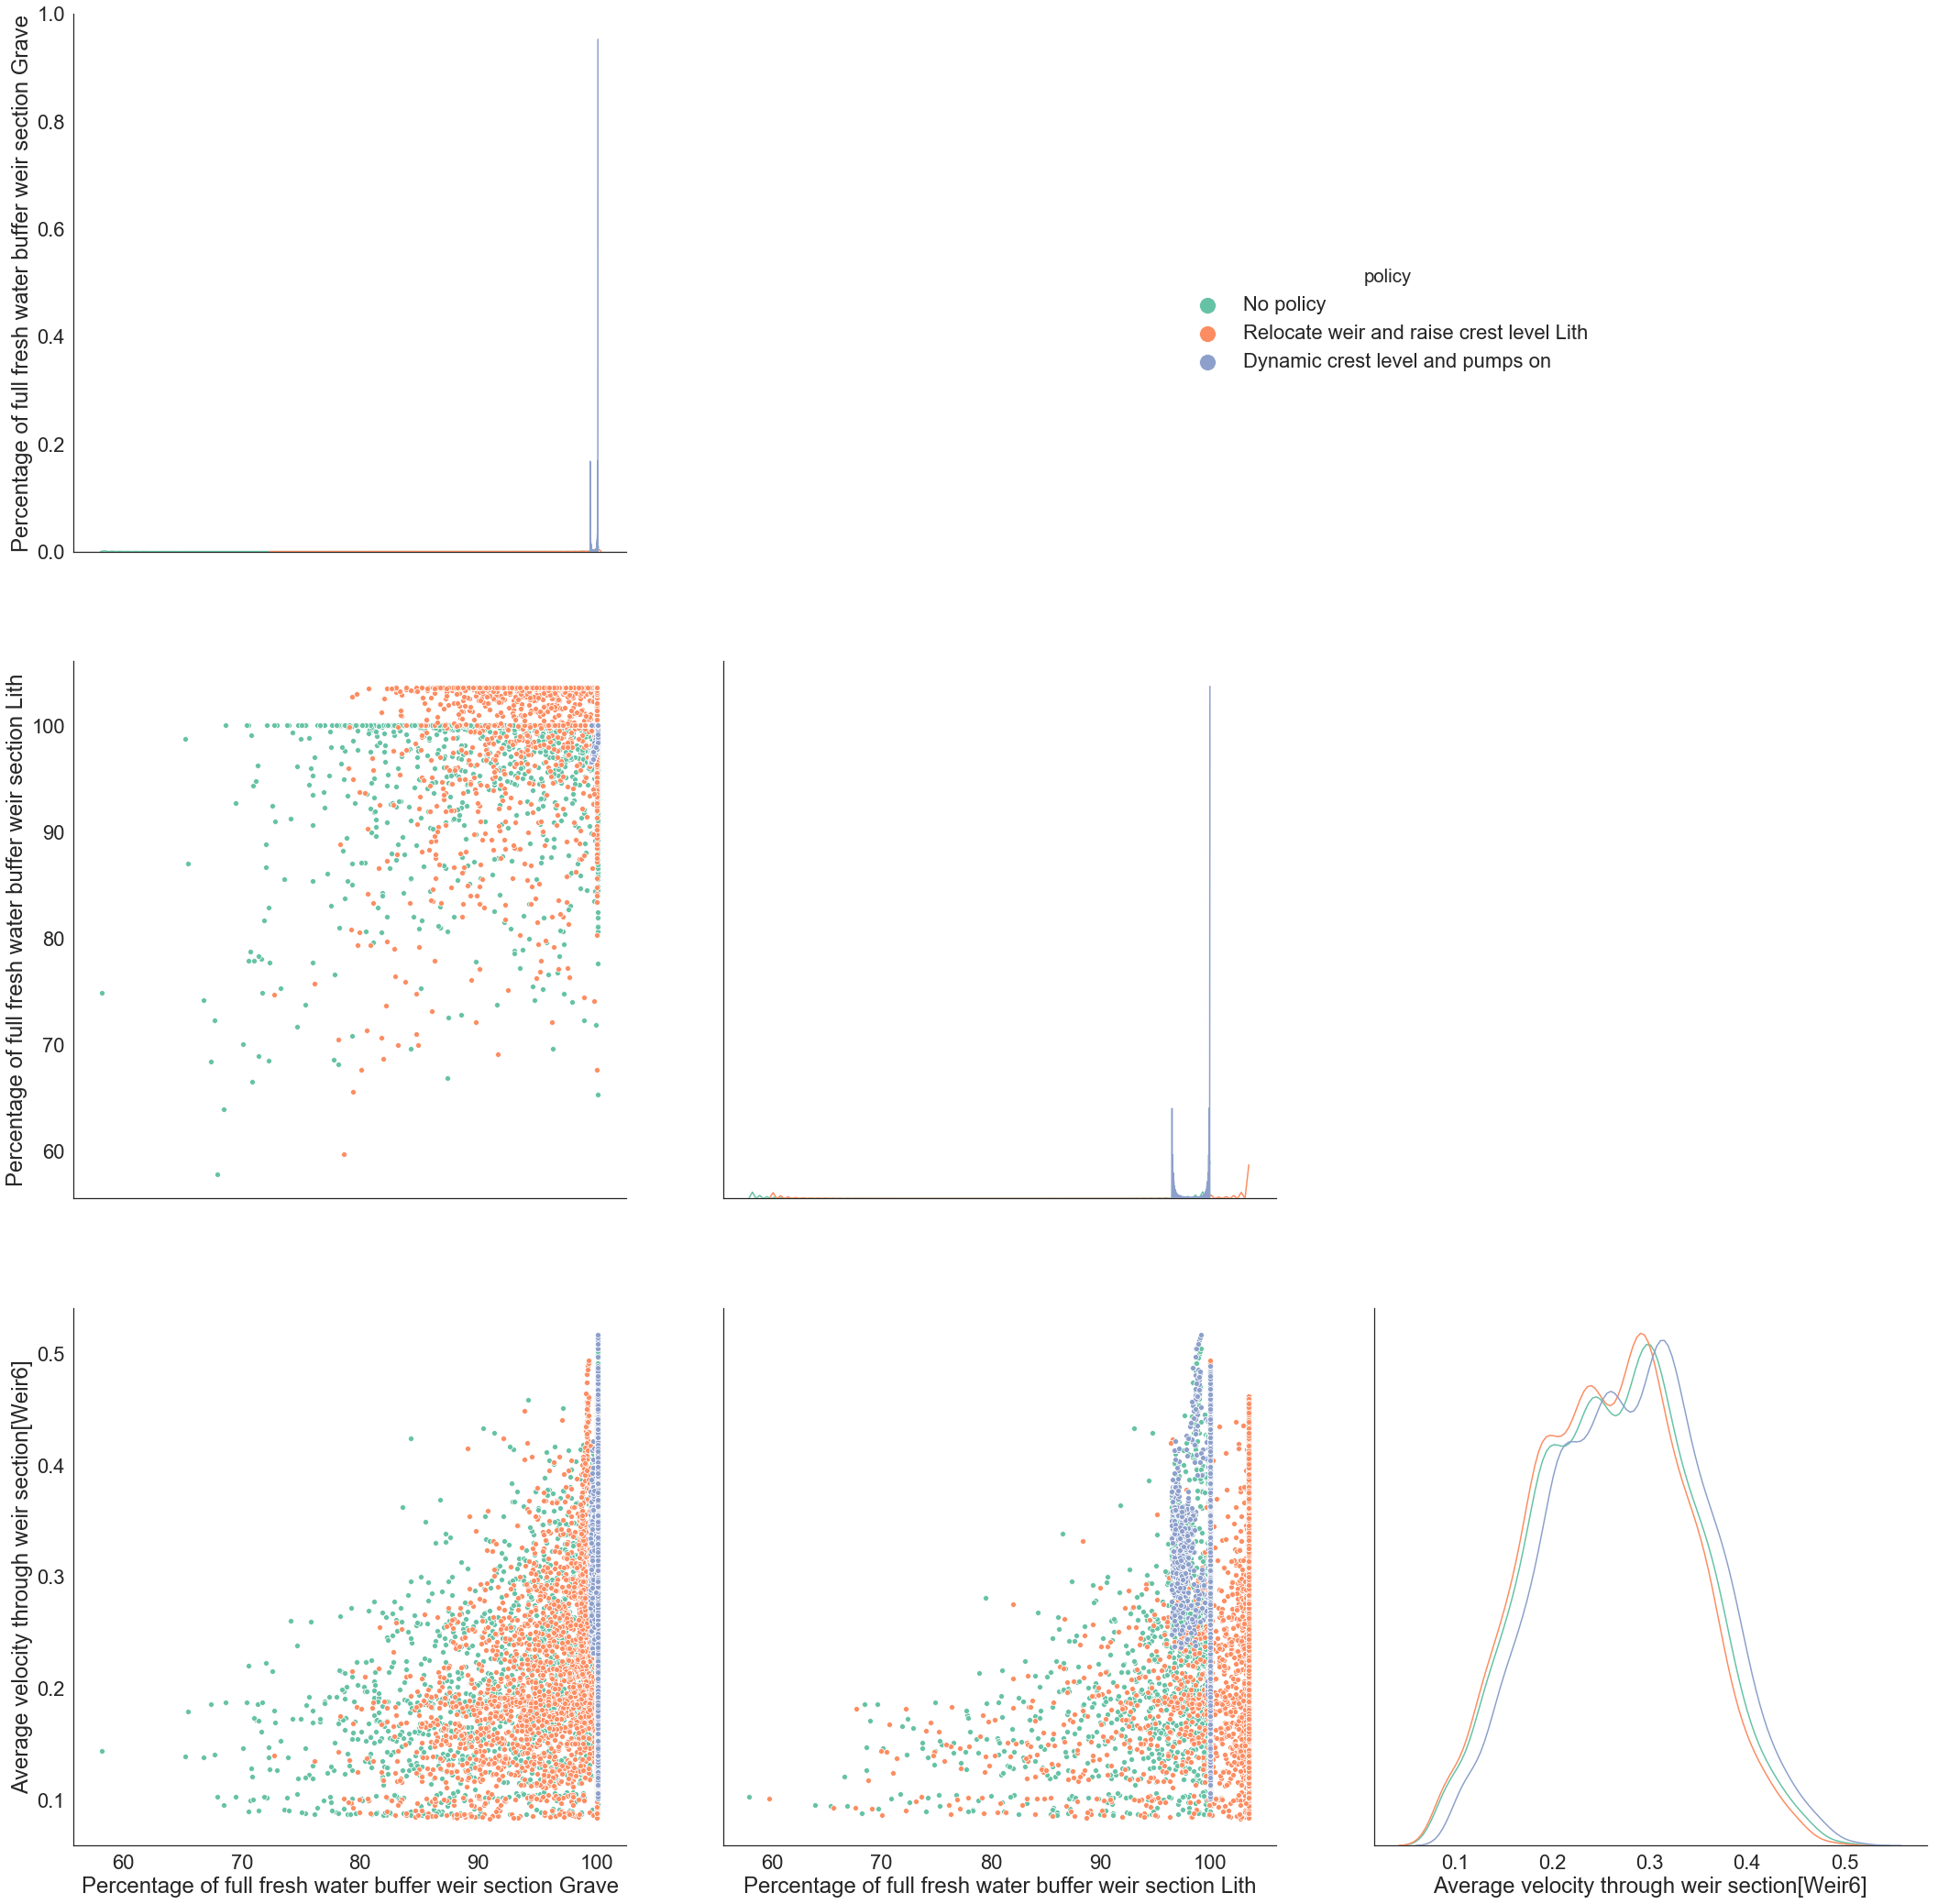

In [21]:
clr_palette = sns.color_palette("Set2",8)


sns.set(font_scale=2, style='white')
g = sns.PairGrid(df_outcome, hue="policy", hue_order=['No policy','Relocate weir and raise crest level Lith',
                                                    'Dynamic crest level and pumps on'],
                 vars=outcome,diag_sharey=False, height=10, palette=clr_palette)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot(data=df_outcome, hue="policy", hue_order=['No policy','Relocate weir and raise crest level Lith',
                                                    'Dynamic crest level and pumps on'], y=))
g.add_legend(bbox_to_anchor=(0.67,0.8),markerscale=3)#, fontsize=30)


g.map_upper(hide_current_axis)

# Sensetivity analysis with feature scoring

In [101]:
#Select KPIs to take into account, not running this cell takes all KPIs into account

outcomes_new = {KPI: df_outcome[KPI] for KPI in outcome}

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


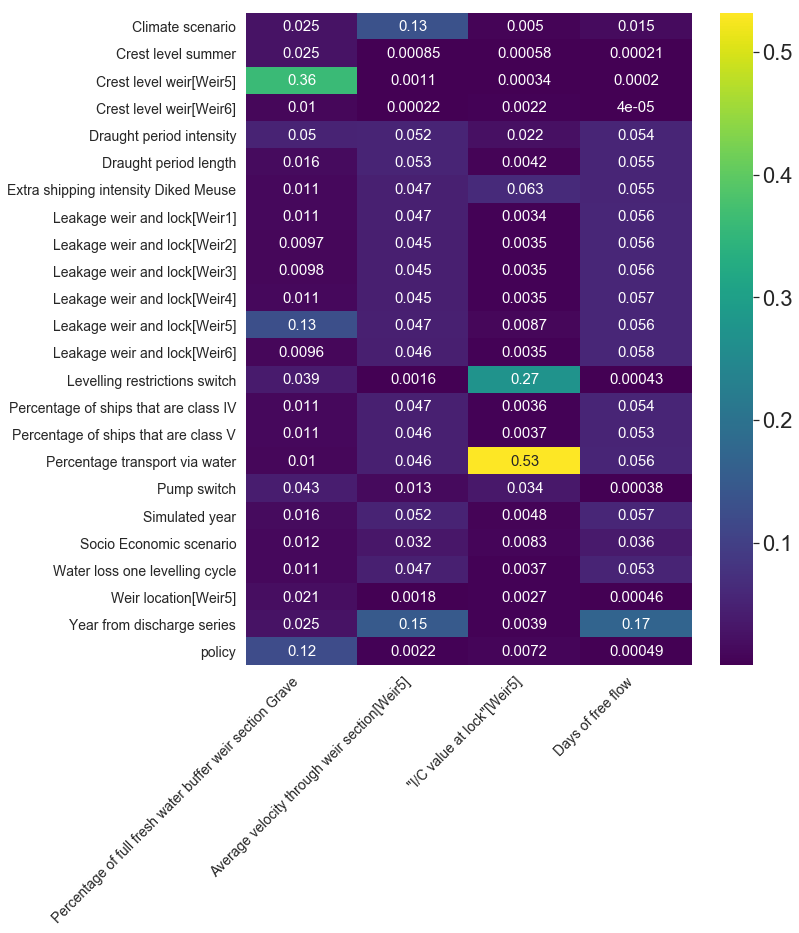

In [116]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes_new

fs = feature_scoring.get_feature_scores_all(x, y)

plt.figure(figsize = (10,12))
ax = sns.heatmap(fs, cmap='viridis', annot=True, annot_kws={'size': 15})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right',
                   fontweight='light', fontsize=14)
plt.yticks(fontsize=14) 
plt.show()